In [2]:
# First, let's read the contents of the uploaded CSV file to understand its structure and contents.
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '../Data/chart.csv'
df = pd.read_csv(file_path)

# Show the first few rows of the DataFrame to understand its structure
df.head()


,Date,ICE US Treasury 7-10 Year Bond
0,2004-12,10000.000000
1,2005-01,10324.682820
2,2005-02,10002.270430
3,2005-03,10152.496204
4,2005-04,10241.718840


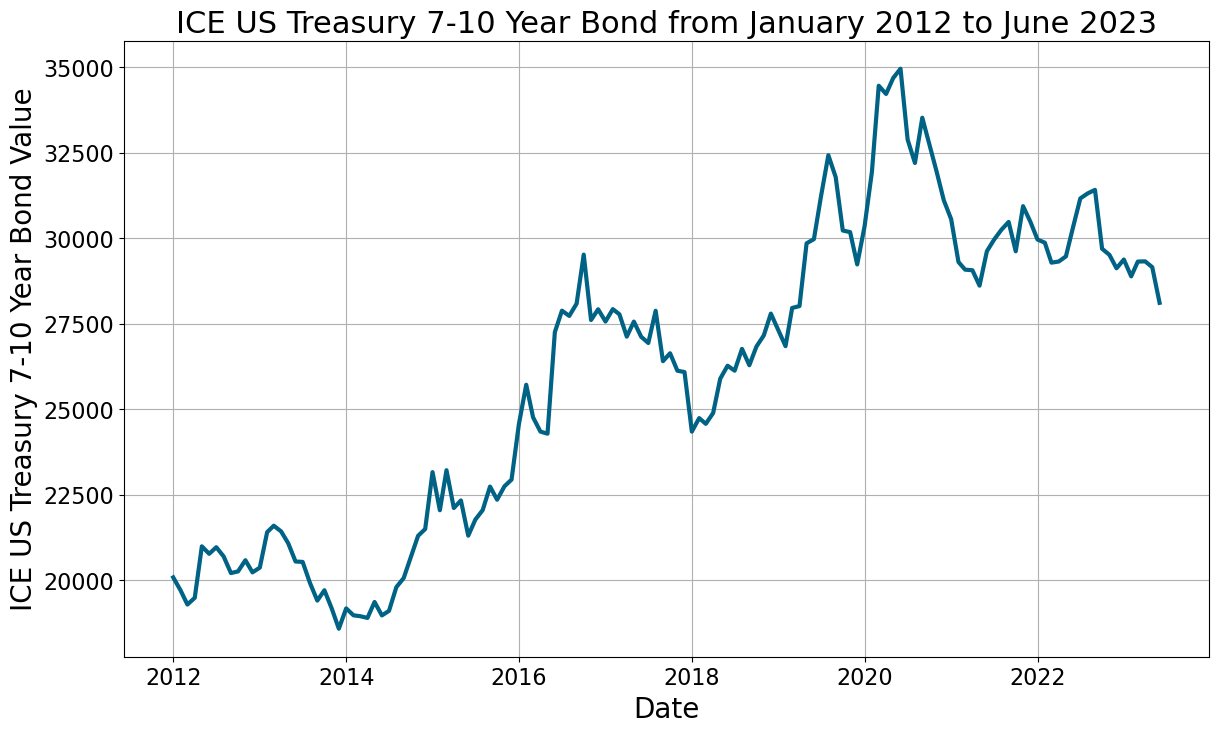

In [3]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

# Filter the data to include only the range from January 2012 to June 2023
df_filtered = df[(df['Date'] >= '2012-01-01') & (df['Date'] <= '2023-06-30')]

# start_value = 10000
# df_filtered['Relative Value'] = (df_filtered['ICE US Treasury 7-10 Year Bond'] / df_filtered['ICE US Treasury 7-10 Year Bond'].iloc[0]) * start_value

# Plot the data
plt.figure(figsize=(14, 8))
plt.plot(df_filtered['Date'], df_filtered['ICE US Treasury 7-10 Year Bond'], linestyle='-', color='#006284', linewidth=3)
plt.title('ICE US Treasury 7-10 Year Bond from January 2012 to June 2023', fontsize=22)
plt.xlabel('Date', fontsize=20)
plt.xticks(fontsize=16)
plt.ylabel('ICE US Treasury 7-10 Year Bond Value', fontsize=20)
plt.yticks(fontsize=16)
plt.grid(True)
# save
plt.savefig('../Data/Images/ice.eps', format='eps')
plt.show()


In [4]:
import numpy as np

# Calculate total return
initial_value = df_filtered['ICE US Treasury 7-10 Year Bond'].iloc[0]
final_value = df_filtered['ICE US Treasury 7-10 Year Bond'].iloc[-1]
total_return = ((final_value - initial_value) / initial_value) * 100

# Calculate the number of years in the dataset
num_years = (df_filtered['Date'].iloc[-1] - df_filtered['Date'].iloc[0]).days / 365.25

# Calculate annualized return
annualized_return = ((1 + (total_return / 100))**(1 / num_years) - 1) * 100

# Create a copy of the filtered DataFrame to avoid the warning
df_filtered_copy = df_filtered.copy()

# Calculate monthly returns on the copy
df_filtered_copy['Monthly Return'] = df_filtered_copy['ICE US Treasury 7-10 Year Bond'].pct_change() * 100

# Calculate annualized volatility on the copy
annualized_volatility = np.sqrt(12) * df_filtered_copy['Monthly Return'].std()

# Recalculate Sharpe ratio
sharpe_ratio = (annualized_return) / annualized_volatility

total_return, annualized_return, annualized_volatility, sharpe_ratio


(40.01010837164427,
 2.9923959443361348,
 10.727268286684891,
 0.27895227977568293)